In [1]:
import numpy as np
from scipy import integrate
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator

# Simulating a Driven Damped Pendulum
We'll be using dimensionless variables so that the natural frequency is equal to 1.

I'll be using the parameters as defined below
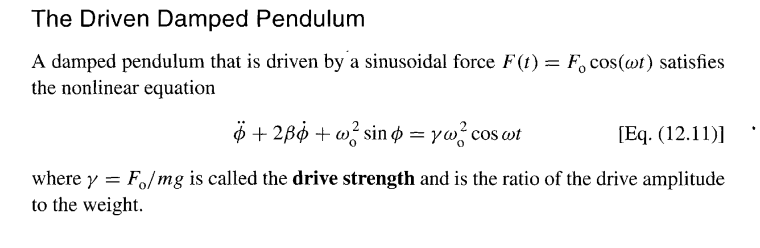

$
\frac{d\phi}{d\\t} = \dot{\phi}
\\[5mm]
\frac{d\dot{\phi}}{d\\t} = -\omega_0^2 sin(\phi) - 2\beta\dot{\phi} + \gamma \omega_0^2 cos(\omega t)
$

In [2]:
# 
def eom_dpp(t,state,beta,gamma,omega0,omega):
    '''
    Function returning derivatives of the dependent quantities theta and omega for a driven damped pendulum
    state: Array of size 2 describing state of the system
        state[0]: phi, the pendulum angle from the vertical
        state[1]: phi_dot, angular velocity    
    beta: damping parameter
    gamma: drive strength
    omega0: Resonant frequency
    omega: drive frequency
    '''

    phi = state[0]
    phi_dot = state[1]

    d_phi_dt = phi_dot
    d_phi_dot_dt = -2*beta*phi_dot - omega0**2*np.sin(phi) + gamma*omega0**2*np.cos(omega*t)
    return (d_phi_dt,d_phi_dot_dt)

In [53]:
phi0 = -np.pi/2        # Initial theta
phi_dot0 = 0    # Initial angular velocity
state0 = np.array([phi0,phi_dot0])


gamma = 1.06        # Driving amplitude
omega = 2*np.pi     # Driving frequency
omega0 =  1.5*omega      # Natural frequency
beta = omega0/8         # Damping parameter

t_start = 0
t_end = 60

t_eval = np.linspace(t_start,t_end,61)
t_eval1 = np.linspace(t_start,t_end,1000)
t_eval2 = np.linspace(t_start,t_end,601)


In [54]:
sol = integrate.solve_ivp(eom_dpp,t_span = (t_start,t_end), y0=state0, 
                          t_eval=t_eval,atol=1e-16, rtol=1e-16,args=(beta,gamma,omega0,omega))

phi = sol.y[0]
phi_dot = sol.y[1]
t = sol.t

sol = integrate.solve_ivp(eom_dpp,t_span = (t_start,t_end), y0=state0, 
                          t_eval=t_eval1,atol=1e-16, rtol=1e-16,args=(beta,gamma,omega0,omega))

phi1 = sol.y[0]
phi_dot1 = sol.y[1]
t1 = sol.t

# sol = integrate.solve_ivp(eom_dpp,t_span = (t_start,t_end), y0=state0, 
#                           t_eval=t_eval2,atol=1e-16, rtol=1e-16,args=(beta,gamma,omega0,omega))

# phi2 = sol.y[0]
# phi_dot2 = sol.y[1]
# t2 = sol.t


c:\Users\hrodrigu\git\DPP_Chaos\DPP_Chaos\.venv\Lib\site-packages\scipy\integrate\_ivp\ivp.py:621: UserWarning: At least one element of `rtol` is too small. Setting `rtol = np.maximum(rtol, 2.220446049250313e-14)`.
  solver = method(fun, t0, y0, tf, vectorized=vectorized, **options)


In [59]:
phi

array([ -1.57079633,  -7.32326026, -13.63244758, -19.97467258,
       -26.00111247, -32.58836714, -32.17537788, -38.15931541,
       -44.87416052, -51.38308981, -57.51690531, -64.03247863,
       -64.18670541, -55.61148706, -50.61645069, -46.36279192,
       -36.62827243, -45.32330006, -42.86677426, -45.233321  ,
       -37.80620516, -34.18982407, -32.42289942, -24.14651998,
       -18.42066518, -16.66937426, -26.79637788, -17.84665746,
       -10.91773252,  -5.22655479,  -0.23559245,   3.53165879,
         5.43228959,  13.65037665,   5.52623609,  -1.0935176 ,
        -1.51777455,   7.23122917,  12.71217457,  15.15493948,
        19.5618766 ,  20.75372416,  11.69889987,   6.07057241,
        -0.66153161,  -7.47493368,   1.77442446,   0.28236656,
        -5.53276796,  -8.70866189,   1.0489555 ,  -7.56644008,
        -8.07203243,   0.96988537,   7.25364776,  10.36779155,
        19.8193099 ,  26.30816246,  17.80938646,  11.38796924,
         7.45452033])

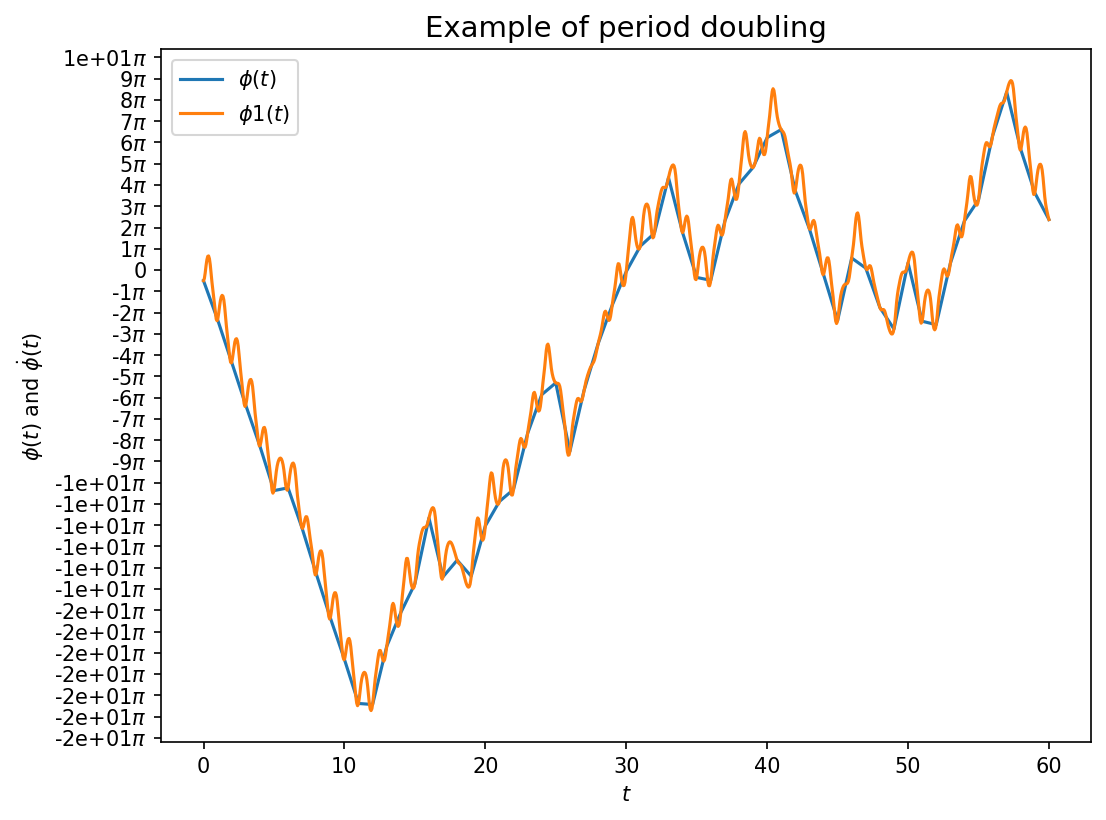

In [60]:
f,ax = plt.subplots(figsize=(8,6),dpi=150)

tplot = 0


ax.plot(t_eval[tplot:],phi[tplot:], label='$\phi(t)$')
ax.plot(t_eval1[tplot:],phi1[tplot:], label='$\phi1(t)$')
# ax.plot(t_eval2,phi2, label='$\phi2(t)$')


ax.set_title("Example of period doubling",fontsize=14)
ax.set_xlabel("$t$")
ax.set_ylabel("$\phi(t)$ and $\dot{\phi}(t)$"); # No idea why I need \\theta
ax.legend()
#ax.set_xlim([0,600])
# For setting the y-axis in units of pi
ax.yaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.yaxis.set_major_locator(MultipleLocator(base=np.pi))

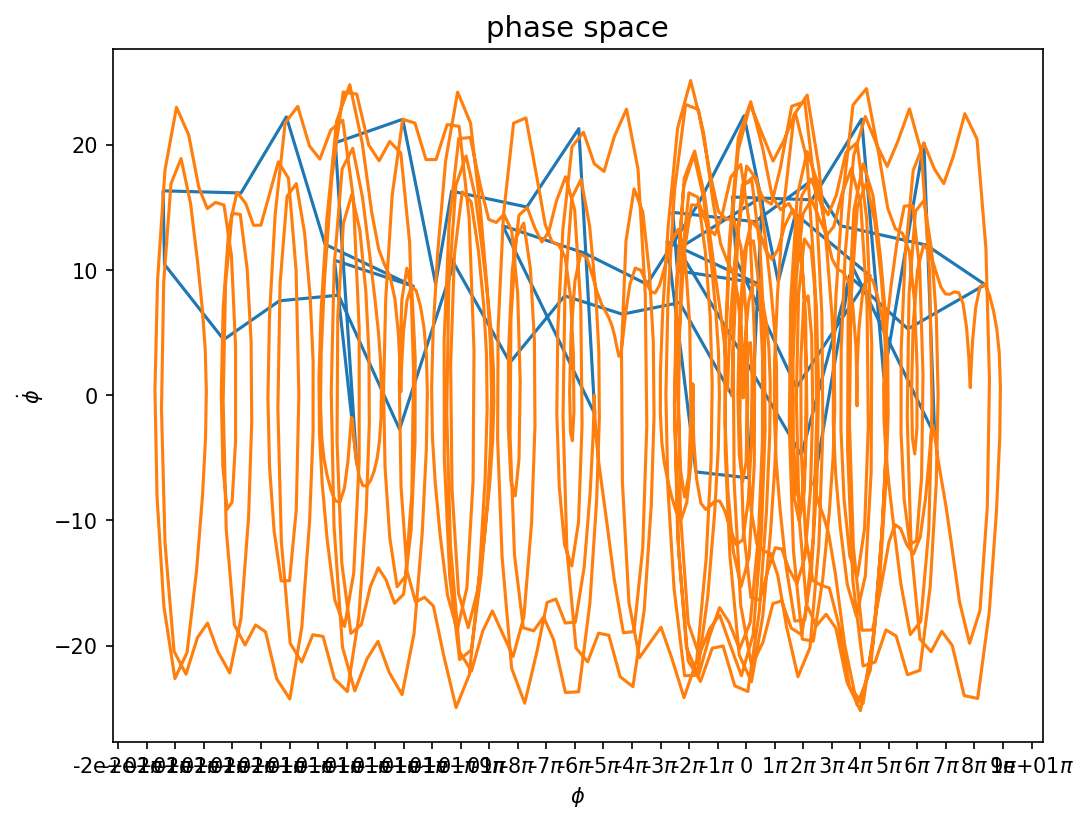

In [70]:
f,ax = plt.subplots(figsize=(8,6),dpi=150)

ax.set_xlabel("$\phi$")
ax.set_ylabel("$\dot{\phi}$")
ax.set_title("phase space",fontsize=14)
tplot = 0

#phi_remainder = np.remainder(phi-1.1*np.pi,2*np.pi)
ax.plot(phi[tplot:],phi_dot[tplot:]);
ax.plot(phi1[tplot:], phi_dot1[tplot:])


# For setting the y-axis in units of pi
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=np.pi))

# Bifurcation Map

In [49]:
t_start = 0
t_end = 600
t_eval = np.linspace(t_start,t_end,601)


gamma_list = np.linspace(1.06,1.087,3)
length_gamma_list = len(gamma_list)
length_bifurcation_pts = len(t_eval[500:])

phi0 = -np.pi/2        # Initial theta
phi_dot0 = 0    # Initial angular velocity
state0 = np.array([phi0,phi_dot0])
omega = 2*np.pi     # Driving frequency
omega0 =  1.5*omega      # Natural frequency
beta = omega0/8         # Damping parameter



#initialize gamma_matrix and birfurcation pts
gamma_matrix = np.ones(shape=(length_gamma_list,length_bifurcation_pts))
bifurcation_pts = np.zeros(shape=(length_gamma_list,length_bifurcation_pts))

for index in np.arange(length_gamma_list):
    gamma_matrix[index] = gamma_list[index]*gamma_matrix[index]

for index in np.arange(length_gamma_list):
    sol = integrate.solve_ivp(eom_dpp,t_span = (t_start,t_end), y0=state0, 
                          t_eval=t_eval,atol=1e-16, rtol=1e-16,args=(beta,gamma_list[index],omega0,omega))

    phi = sol.y[0]
    
    bifurcation_pts[index] = phi[500:]




In [50]:
print(gamma_list[1])
# bifurcation_pts.shape

1.0735000000000001


Text(0.5, 1.0, 'Bifurcation Map')

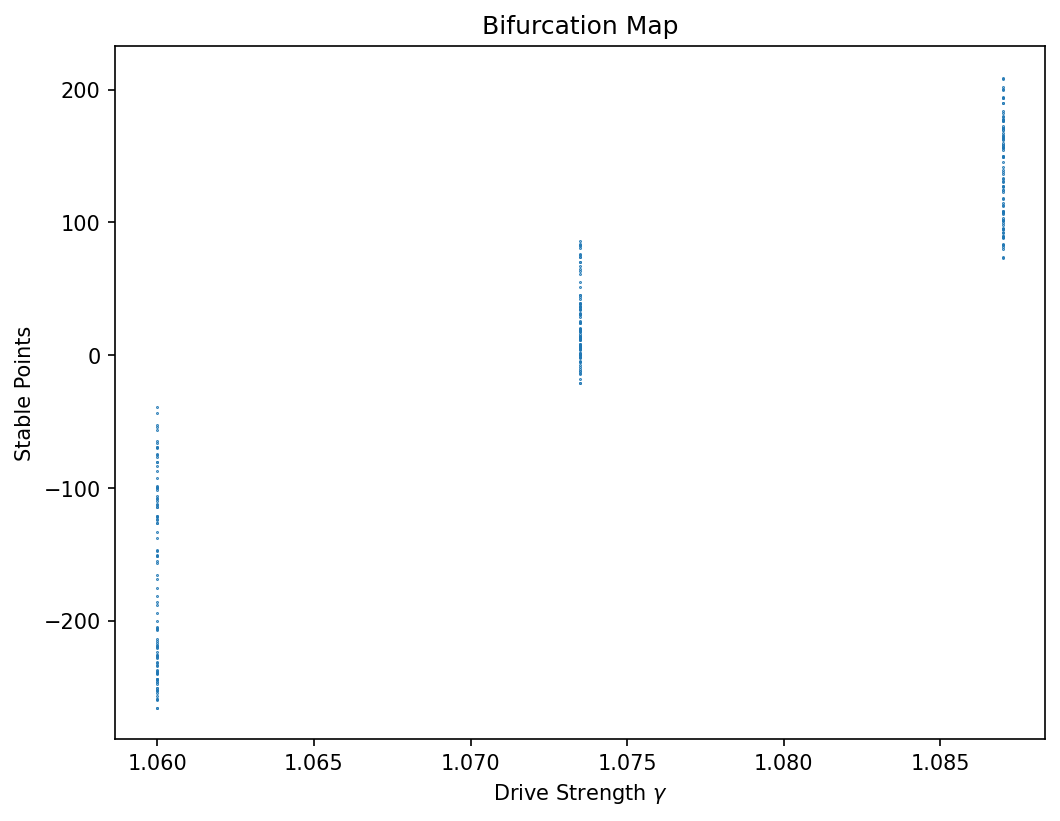

In [51]:
fig, ax = plt.subplots(figsize = (8,6), dpi=150)


ax.scatter(gamma_matrix,bifurcation_pts, s=0.15)
ax.set_xlabel('Drive Strength $\gamma$')
ax.set_ylabel('Stable Points')
ax.set_title('Bifurcation Map')

Text(0.5, 1.0, 'Bifurcation Map')

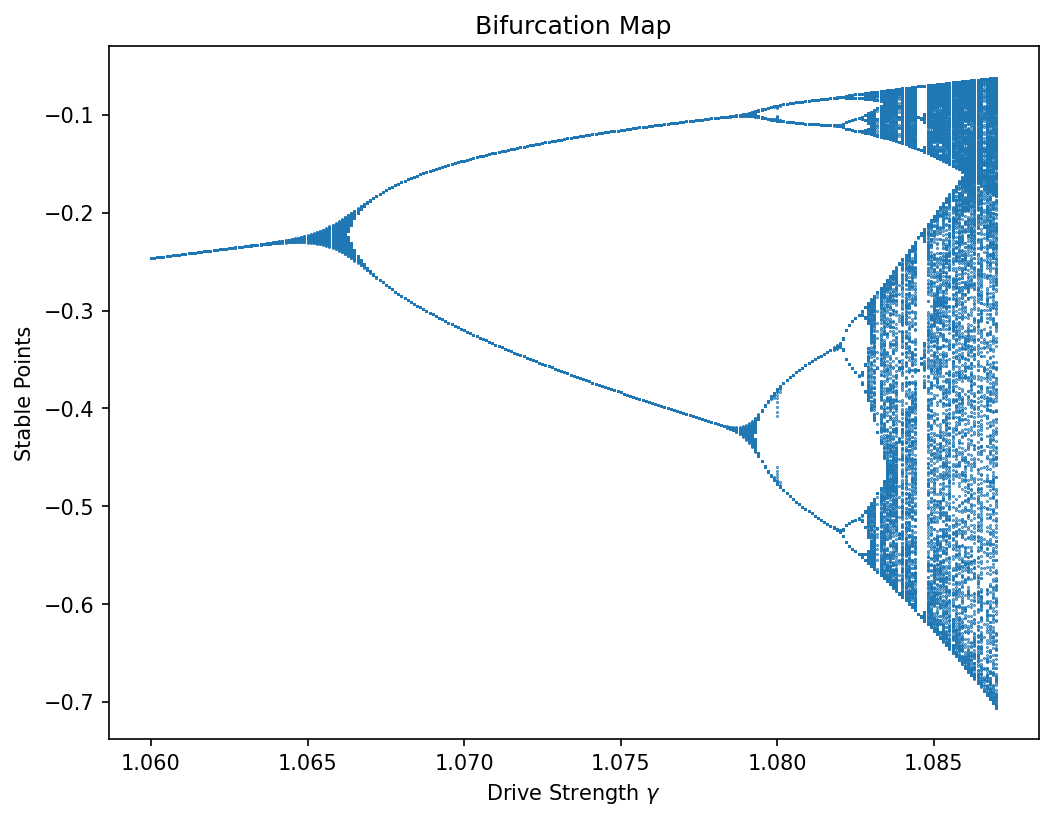

In [ ]:
fig, ax = plt.subplots(figsize = (8,6), dpi=150)


ax.scatter(gamma_matrix,bifurcation_pts, s=0.15)
ax.set_xlabel('Drive Strength $\gamma$')
ax.set_ylabel('Stable Points')
ax.set_title('Bifurcation Map')

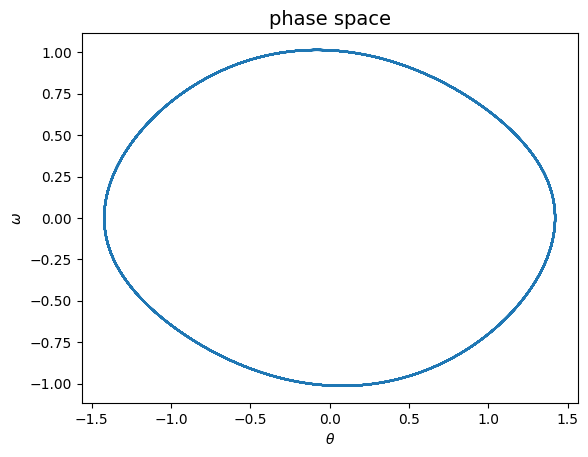

In [19]:
plt.figure(4)
plt.xlabel("$\\theta$")
plt.ylabel("$\omega$")
plt.title("phase space",fontsize=14)
tplot = 5000
plt.plot(th[tplot:],om[tplot:]);

In [10]:
th0 = 0.1       # Initial theta
om0 = 0         # Initial angular velocity
u0 = np.array([th0,om0])# Combine initial conditions in array
b = 0.5         # Damping parameter
g = 1.105        # Driving amplitude
om_d = 2./3     # Driving frequency
t_d = 2*np.pi/om_d

t = np.linspace(14,1000*t_d, 10001)      # NOTE: The  points selected 
                                       # for plotting are not the 
                                       # points used for the numerical evalution.
th, om = integrate.odeint(eqs,u0,t,args=(b,g,om_d)).T

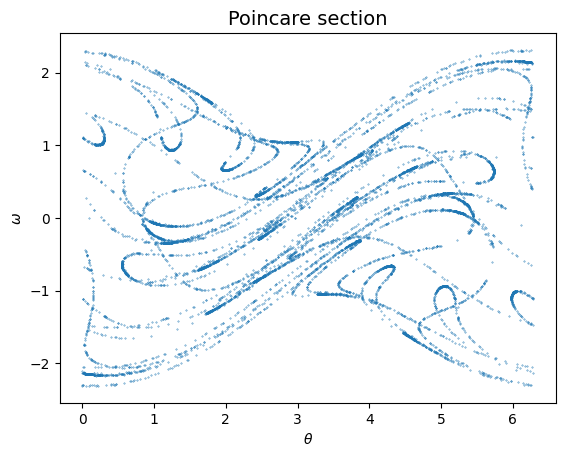

In [11]:
plt.figure(5)
plt.xlabel("$\\theta$")
plt.ylabel("$\omega$")
plt.title("Poincare section",fontsize=14)
plt.scatter(th%(2*np.pi),om,s=0.1);